### Import all required libraries



In [57]:
# todo
import os,sys,time
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, initializers,preprocessing
import matplotlib.pyplot as plt
from PIL import Image

In [58]:

# todo
### Load the image data or define the data loader

train_path = '/Users/llm/Desktop/dmml_bonus_2021_scripts_2/archive/training/training'
valid_path = '/Users/llm/Desktop/dmml_bonus_2021_scripts_2/archive/validation/validation'
label_path = '/Users/llm/Desktop/dmml_bonus_2021_scripts_2/archive/monkey_labels.txt'

# data augmentation
'''
reference : https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

'''
train_datagen = preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True, 
    fill_mode = "nearest"
)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (128, 128),
    batch_size = 64,
    seed = 7,
    shuffle = True,
    class_mode = 'categorical'
)
valid_datagen = preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)
valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size = (128, 128),
    batch_size = 64,
    seed = 7,
    shuffle = False,
    class_mode = 'categorical')
train_num = train_generator.samples
valid_num = valid_generator.samples

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


### Define your model architecture



In [59]:
# todo
'''
Refernce : https://www.tensorflow.org/tutorials/images/cnn?hl=zh-eg

'''
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 12, 12, 64)       

### Define your training setup




In [60]:
# todo
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

### Initialize your model weights


In [61]:
# todo
'''
Reference: https://keras.io/api/layers/initializers/

'''

initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)


### Run the training process



In [62]:
# todo
'''
Reference: https://www.tensorflow.org/tutorials/images/cnn?hl=zh-eg

'''

history = model.fit_generator(train_generator, 
                              steps_per_epoch=train_num // 64, 
                              epochs=20, 
                              validation_data=valid_generator,
                              validation_steps=valid_num // 64)

Epoch 1/20
17/17 [==============================] - 28s 2s/step - loss: 2.3063 - accuracy: 0.1132 - val_loss: 2.2960 - val_accuracy: 0.1484
Epoch 2/20
17/17 [==============================] - 27s 2s/step - loss: 2.2861 - accuracy: 0.1441 - val_loss: 2.2467 - val_accuracy: 0.1953
Epoch 3/20
17/17 [==============================] - 27s 2s/step - loss: 2.1840 - accuracy: 0.1838 - val_loss: 2.1555 - val_accuracy: 0.1641
Epoch 4/20
17/17 [==============================] - 26s 2s/step - loss: 2.0750 - accuracy: 0.2157 - val_loss: 2.0036 - val_accuracy: 0.2578
Epoch 5/20
17/17 [==============================] - 26s 2s/step - loss: 1.9784 - accuracy: 0.2766 - val_loss: 1.9213 - val_accuracy: 0.3672
Epoch 6/20
17/17 [==============================] - 27s 2s/step - loss: 1.8872 - accuracy: 0.3085 - val_loss: 1.7197 - val_accuracy: 0.4180
Epoch 7/20
17/17 [==============================] - 27s 2s/step - loss: 1.8034 - accuracy: 0.3472 - val_loss: 1.6083 - val_accuracy: 0.4023
Epoch 8/20
17/17 [==

### Plot the learning curves


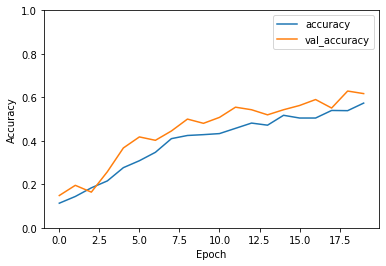

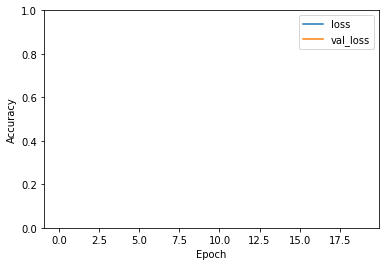

In [64]:
# todo
'''
Reference: https://www.tensorflow.org/tutorials/images/cnn?hl=zh-eg

'''

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.2])
plt.legend()
plt.show()
